## Projet GraphAlgo (FR)
Ce projet est un projet personnel, il me sert d'exercice : les explications sont donc en français.

**Objectif(s)** :
L'objectif principal est de créer un algorithme capable de générer un graphique boursier de manière procédurale.
***


### Initialisation

In [1]:
#import des librairies nécessaires
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Exemple d'utilisation

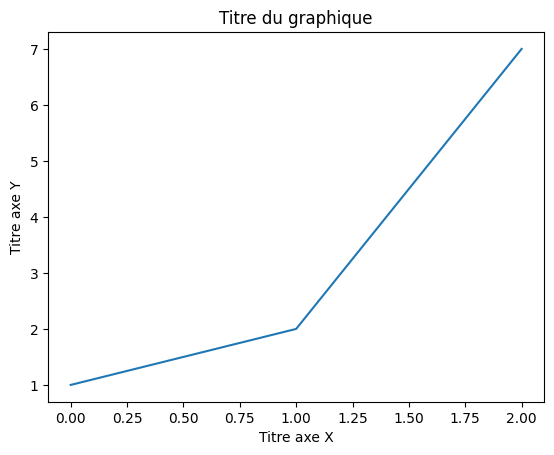

In [2]:
#exemple de base d'utilisation de matplotlib dans jupyter notebook
x = range(3)
y = [1, 2, 7]

plt.plot(x, y) #création du graphique
plt.title("Titre du graphique")
plt.xlabel("Titre axe X")
plt.ylabel("Titre axe Y")

plt.show() #affichage du graphique

### Début du projet - déclaration des variables
On va essayer de générer des valeurs pour construire un graphique boursier sur une année. 
Les valeurs seront stockées par groupe (mois, jours), pour une année il nous faut donc 12 valeurs de mois (début du mois - jour 1 du mois en question) et 365 valeurs de jours sachant que les 12 valeurs de mois constituent déjà les valeurs des premiers jours de chaque mois.

Dans cet exercice je vais utiliser la base d'un calendrier grégorien.

In [3]:
annee_classique = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
annee_bissextile = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

In [4]:
valeurs = [] #liste qui va stocker nos valeurs (points sur l'axe X à placer)
annees = [] #liste qui va stocker les différentes années

In [5]:
valeur_depart = 100 #valeur par défaut
f_reussite = 1 #facteur chance réussite
f_faillite = 1 #facteur chance faillite
taux = 0.05 #5% en moyenne
probaNormale = 0.50 #50%

### Déclaration des fonctions

In [6]:
def njAnnee(annee):
    """
    Retourne 366 si l'année est bissextile 
    Retourne 365 l'année est classique

    Règles :
    - une année est bissextile si elle est divisible par 4.
    - si elle est divisible par 100 elle n'est pas bissextile sauf si elle est divisible par 400.
    """
    if annee % 400 == 0:
        return 366
    elif annee % 100 == 0:
        return 365
    elif annee % 4 == 0:
        return 366
    else:
        return 365

In [7]:
def logiqueAnnee(debut, fin):
    """
    Logique de calcul pour les différentes variables en lien avec les années, etc...
    """
    annees = [annee for annee in range(debut,fin)] #l'année de fin n'est pas incluse
    n_annees = len(annees)
    n_mois = n_annees * 12
    jours_ans = [njAnnee(annee) for annee in annees]
    n_jours = sum(jours_ans)
    return annees, n_annees, n_mois, jours_ans, n_jours

In [8]:
def calcNvTaux():
    pass

In [9]:
def calcFaillite(jour, totjours, fxFaillite, fxReussite, taux, valeur_depart, probaReussite):
    """
    Permet de calculer la probabilité de faillite
    """
    
    return probaFaillite

In [10]:
def calcReussite(jour, totjours, fxFaillite, fxReussite, taux, valeur_depart, probaRFaillite):
    """
    Permet de calculer la probabilité de réussite
    """
    
    return probaReussite

In [11]:
def calcul(jour, totjours, fxFaillite, fxReussite, taux, valeur_depart, ancienne_valeur, probaNormale, n_annees):
    """
    Fonction de calcul principale
    """
    rayon = 9999 #j'attribue une valeur pour pouvoir distribuer juste après (10000)
    taux_journee = taux*n_annees / totjours #si tout ce passe bien, au bout d'un an on aura le taux annuel appliqué (si 100% probaNormale)
    
    if probaNormale == 1:
        nouvelle_valeur = ancienne_valeur * (1+taux_journee)
    else:
        pass
    
    return nouvelle_valeur

### Test de la logique du nombre d'années, jours, etc..
L'utilisateur va dans un premier temps définir la date de départ ainsi que la date de fin.

On considèrera que l'année de fin est supérieure à l'année de début (question de bon sens). 

**Entrée des valeurs de départ**

In [12]:
start_annee = 2024
fin_annee = 2027

In [13]:
annees, n_annees, n_mois, jours_ans, n_jours = logiqueAnnee(start_annee, fin_annee) #voir "déclaration des fonctions" si on ne comprend pas

**Vérification**

In [14]:
print(annees)
print(n_annees)
print(n_mois)
print(jours_ans)
print(n_jours)

[2024, 2025, 2026]
3
36
[366, 365, 365]
1096


### Création des graphiques

**Ajustement des paramètres**

In [15]:
start_annee = 2024
fin_annee = 2025

valeur_depart = 100
f_reussite = 1
f_faillite = 1
taux = 0.05
probaNormale = 1

**Résultat obtenu lors de cette génération à partir de ces paramètres**

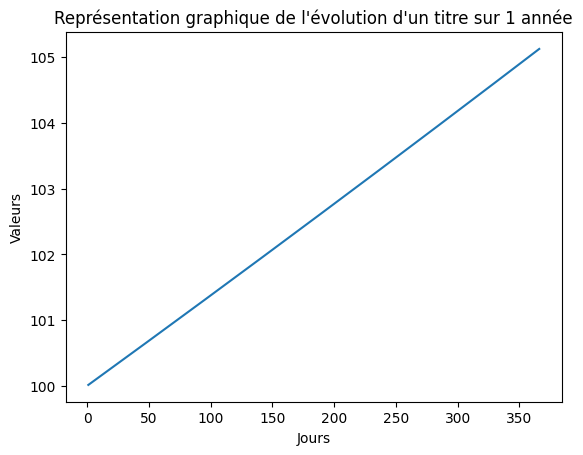

In [16]:
annees, n_annees, n_mois, jours_ans, n_jours = logiqueAnnee(start_annee, fin_annee)
compteur = 0

for i in range(1,n_jours+1):
    if compteur == 0:
        ancienne_valeur = valeur_depart
        valeurs.append(calcul(i, n_jours, f_faillite, f_reussite, taux, valeur_depart, ancienne_valeur, probaNormale, n_annees))
    else:
        ancienne_valeur = valeurs[i-2]
        valeurs.append(calcul(i, n_jours, f_faillite, f_reussite, taux, valeur_depart, ancienne_valeur, probaNormale, n_annees))
    compteur =+ 1

#en gros x représente les jours alors que y représente les valeurs boursières
x = range(1,n_jours+1)
y = valeurs

plt.plot(x, y)
plt.title("Représentation graphique de l'évolution d'un titre sur 1 année")
plt.xlabel("Jours")
plt.ylabel("Valeurs")

plt.show()